### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [1]:
#!conda install -y -c anaconda spacy 

In [2]:
#!python -m spacy download es_core_news_sm

In [3]:
#!python -m spacy download es_core_news_md

In [4]:
#!conda install -y -c conda-forge wordcloud

In [5]:
#!conda install -y -c conda-forge textacy

In [6]:
#!conda install -y  -c anaconda nltk 

In [7]:
import spacy
import os
from spacy.lang.es.examples import sentences
import pandas as pd 
import shutil
#from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textacy
import re
import nltk
#from nltk.util import ngrams
import numpy as np

import lib.nlp_cba as nlp_cba
import lib.graph_cba as graph_cba

Las siguientes variables indican si los data frames agregated_corpus_df y corpus_df se generan a partir de los documentos que contienen los fallos, o bien a partir de archivos los cuales tienen los datos procesesados.

In [8]:
#True: Los Data frames corpus_df y aggregated_corups_df se levantan desde archivos CSV
#False: Los Data frames corpus_df y aggregated_corups_df se generan a partir de los archivos
# ubicados en root_path

load_preprocessed_files = True

#True: Los Data frames corpus_df y aggregated_corups_df se graban en archivos CSV.
#False: No se graban los Data frames corpus_df y aggregated_corups_df
save_preprocessed_files = False


# Generar un corpus con todos los documentos

In [9]:
if not load_preprocessed_files: 
   
    root_path = "Documentos"

    print(f"Se buscan los archivos en la carpeta {root_path}")
        
    directories = [x[0] for x in os.walk(root_path)]

    directories.pop(0)

    for directory in directories:
        print (directory)


In [10]:
if not load_preprocessed_files:
    #Caracteres que se reemplazan en el texto
    characters_to_replace = [',', ':' , "\n" , "”"]

    #Los caracteres se reemaplzan por un espacio en blanco
    new_character = " "

    print(f"Se eliminan los siguientes caracteres del texto {characters_to_replace}")
    
    mapMultipleCharsToChar = nlp_cba.MapMultipleCharsToCharProcessor(characters_to_replace , new_character , True)
    textCleaner = nlp_cba.TextCleaner()
    textCleaner.registerProcessor(mapMultipleCharsToChar)

    corpus_df = nlp_cba.generate_corpus_df(directories , textCleaner)
    corpus_df

In [11]:
if save_preprocessed_files: 
    print (f"Se almacena el data frame corpus_df en el archivo corpus.csv")
    corpus_df.to_csv("corpus.csv" ,index= False)

In [12]:
if load_preprocessed_files:
    print (f"El data frame corpus_df se carga desde el archivo corpus.csv")
    corpus_df = pd.read_csv("corpus.csv")
    
corpus_df

El data frame corpus_df se carga desde el archivo corpus.csv


,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,unívoco 18900 fecha 04/04/2016 materia niñe...,Documentos/MENORES
2,13/03/2013 juzgado de la niñez juventud y vio...,Documentos/MENORES
3,los autos caratulados a. a. - denuncia...,Documentos/MENORES
4,juzg. de niñez adolescencia y violencia famil...,Documentos/MENORES
...,...,...
238,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
239,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
240,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
241,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [13]:
def create_df_text_agregated_by_foro (directories , corpus_df):

    agregated_corpus =  []
    for directory in directories:
    
        text = corpus_df[corpus_df['classifier'] == directory ]['text'].tolist()
        text = " ".join(text)
        agregated_corpus.append([text , directory])
        
    return pd.DataFrame(agregated_corpus, columns=["text", "classifier"] )


In [14]:
if not load_preprocessed_files:
    print (f"Se genera el dataframe agregated_corups_df")
    agregated_corups_df = create_df_text_agregated_by_foro(directories, corpus_df)

In [15]:
if save_preprocessed_files: 
    print (f"Se almacena el data frame agregated_corpus en el archivo agregated_corpus.csv")
    agregated_corups_df.to_csv("agregated_corpus.csv" ,index= False)

In [16]:
if load_preprocessed_files:
    print (f"El data frame agregated_corups_df se carga desde el archivo corpus.csv")
    agregated_corups_df = pd.read_csv("agregated_corpus.csv")

agregated_corups_df

El data frame agregated_corups_df se carga desde el archivo corpus.csv


,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,auto número sesenta y seis córdoba cinco de...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


# Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

In [17]:
(df_common_words_menores,common_words_menores ) = nlp_cba.get_word_ocurrence_df(agregated_corups_df, 'Documentos/MENORES')
(df_common_words_penal, common_words_penal)  = nlp_cba.get_word_ocurrence_df(agregated_corups_df, 'Documentos/FAMILIA')
(df_common_words_familia, common_words_familia)= nlp_cba.get_word_ocurrence_df(agregated_corups_df, 'Documentos/LABORAL')
(df_common_words_laboral, common_words_laboral) = nlp_cba.get_word_ocurrence_df(agregated_corups_df,'Documentos/PENAL')

In [18]:
merged = pd.merge(df_common_words_menores,df_common_words_penal, on='word' , how='outer')

merged = pd.merge(merged,df_common_words_familia, on='word' , how='outer')

merged = pd.merge(merged,df_common_words_laboral, on='word' , how='outer')

colums_names = ['word' , 'menores_word_count', 'penal_word_count' , 'famila_word_count', 'laboral_word_count']
merged.columns = colums_names

merged.replace(np.nan, 0 , inplace=True)

merged['total_word_count'] = merged['menores_word_count'] + merged['penal_word_count'] + merged['famila_word_count'] + merged['laboral_word_count']
df_common_word_total = merged

In [19]:
df_common_words_menores.shape

(15053, 2)

In [20]:
df_common_words_penal.shape

(26564, 2)

In [21]:
df_common_words_familia.shape

(7475, 2)

In [22]:
df_common_words_laboral.shape

(29961, 2)

In [23]:
df_common_word_total.shape

(52926, 6)

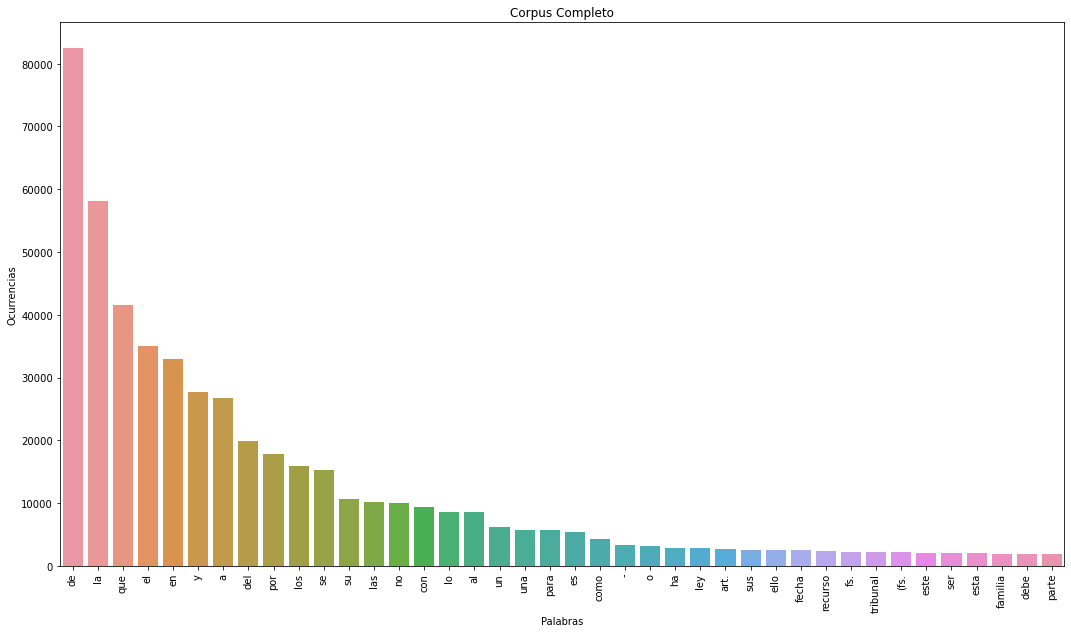

In [24]:
limit_to_plot=40

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes, x = "word" , y = "total_word_count", df = df_common_word_total ,title ="Corpus Completo" , limit_to_plot = limit_to_plot  )

### Histograma de frecuencias de palabaras por Corpus completo y por Fuero

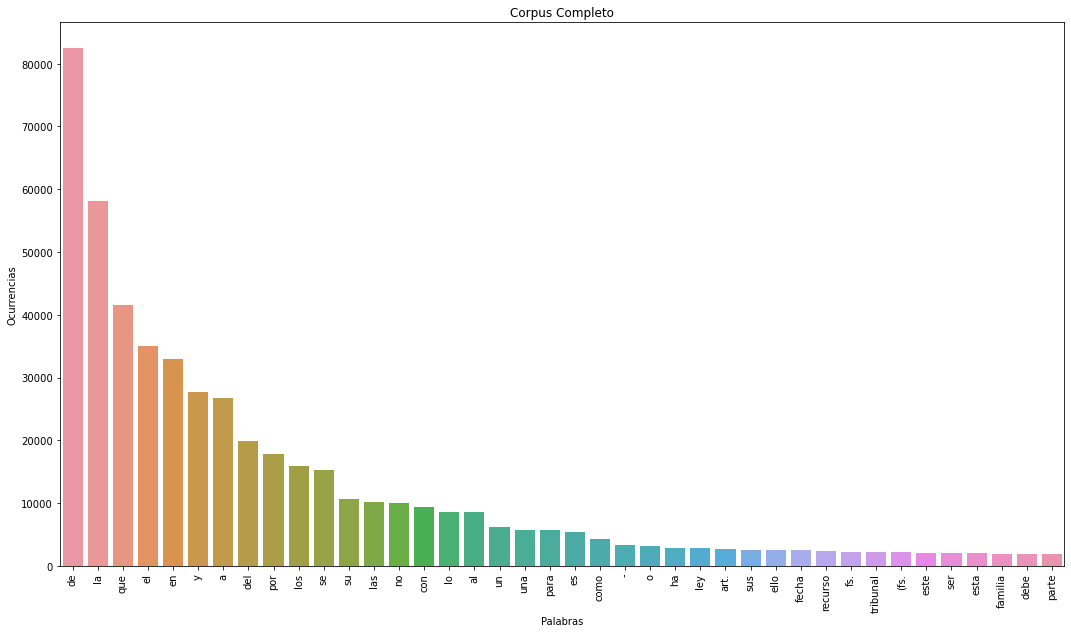

In [25]:
limit_to_plot=40

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes, x = "word" , y = "total_word_count", df = df_common_word_total ,title ="Corpus Completo" , limit_to_plot = limit_to_plot  )

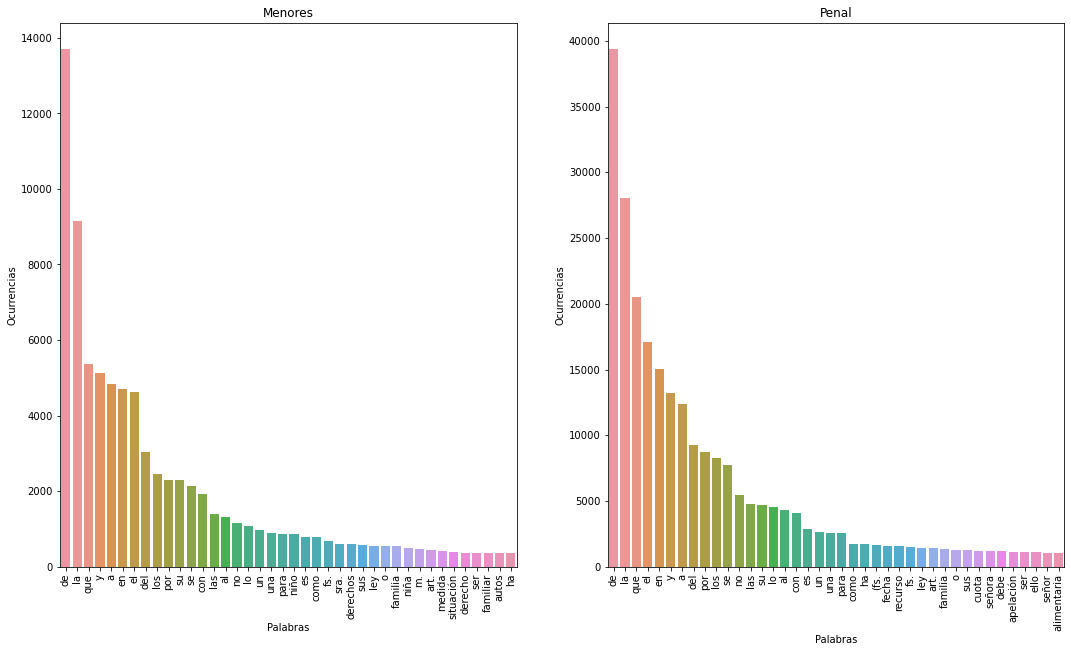

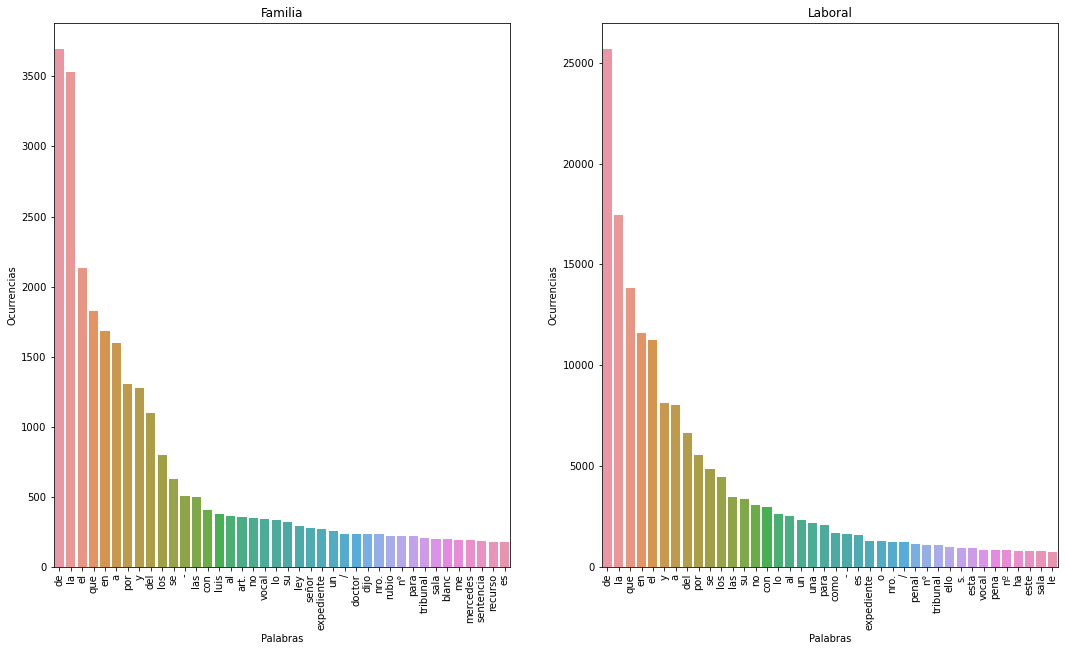

In [26]:


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_menores ,title ="Menores" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_penal ,title ="Penal" , limit_to_plot = limit_to_plot )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_familia ,title ="Familia" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_laboral ,title ="Laboral" , limit_to_plot = limit_to_plot )

# Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

# Hacer lo mismo con n-gramas.

### Distribucion de frecuencias n-gramas (bi-gramas en este caso)

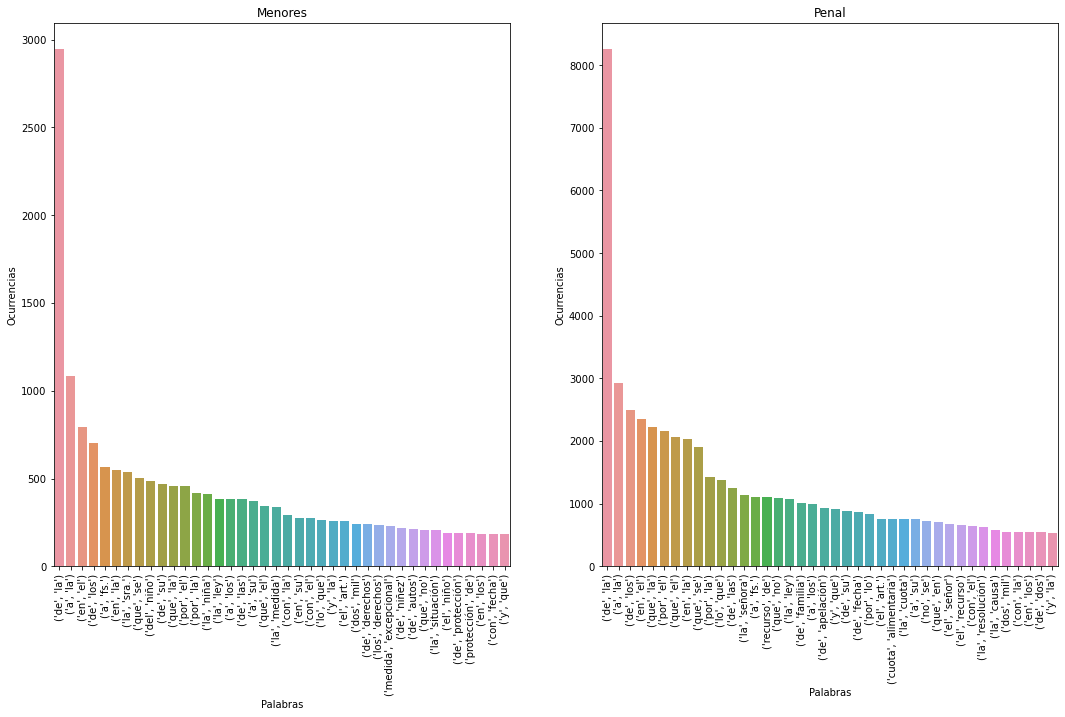

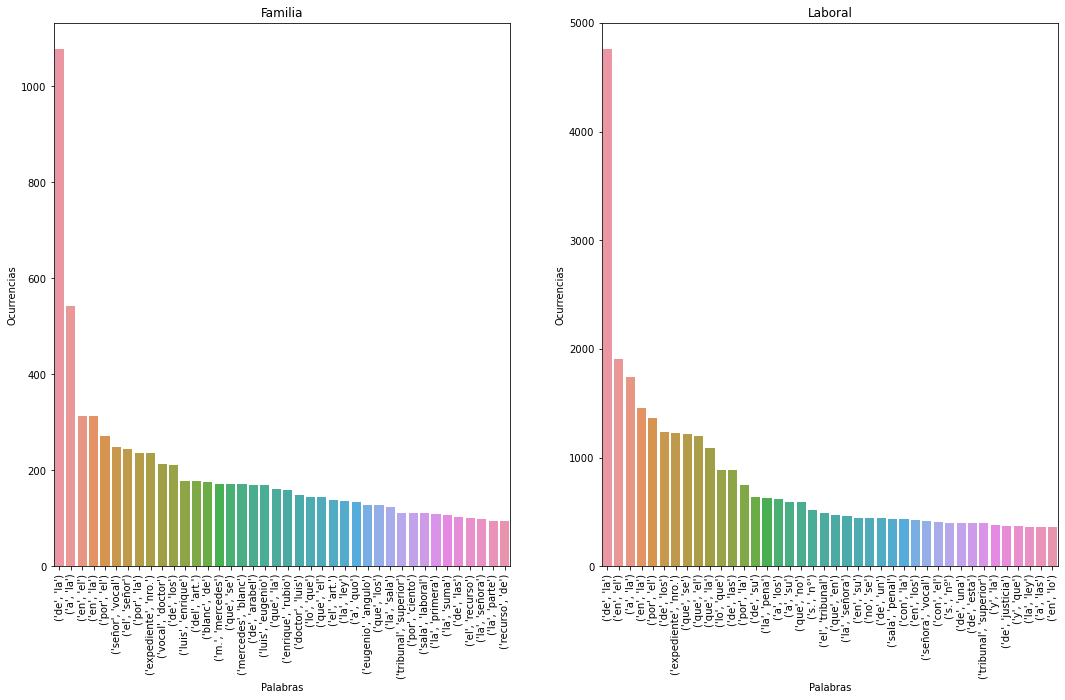

In [27]:
n_gram_count = 2

df_menores_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_menores,n_gram_count )
df_penal_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_penal,n_gram_count )
df_familia_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_familia,n_gram_count )
df_laboral_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_laboral,n_gram_count )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_menores_anagrams_count ,title ="Menores" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_penal_anagrams_count ,title ="Penal" , limit_to_plot = limit_to_plot )

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_familia_anagrams_count ,title ="Familia" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_laboral_anagrams_count ,title ="Laboral" , limit_to_plot = limit_to_plot )


### Visualizar la frecuencia de bi-gramas en una nube de palabras

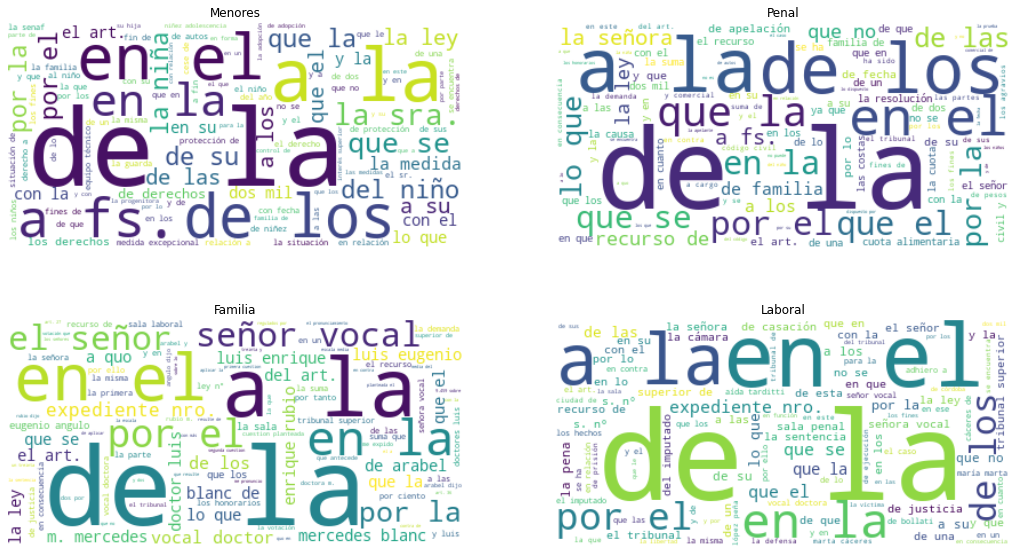

In [28]:
limit_words = 100


df_menores_anagrams_count_tmp = nlp_cba.get_df_word_cloud(df = df_menores_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_penal_anagrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_penal_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_familia_anagrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_familia_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_laboral_anagrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_laboral_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes[0][0], df_menores_anagrams_count_tmp , limit_words, "Menores" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[0][1], df_penal_anagrams_count_tmp , limit_words, "Penal" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][0], df_familia_anagrams_count_tmp , limit_words, "Familia" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][1], df_laboral_anagrams_count_tmp , limit_words, "Laboral" , columns = ["word_","count"])

# Visualizar la frecuencia de palabras en una nube de palabras.

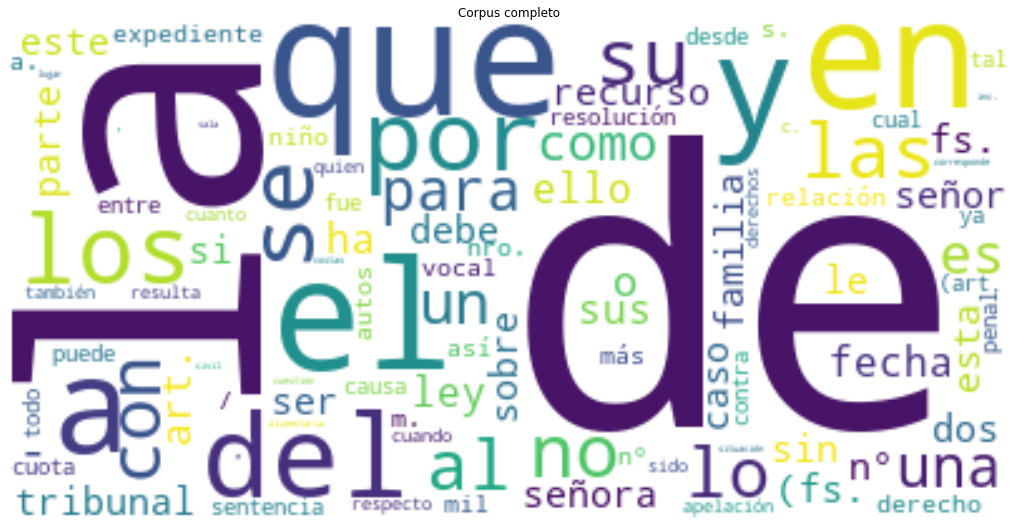

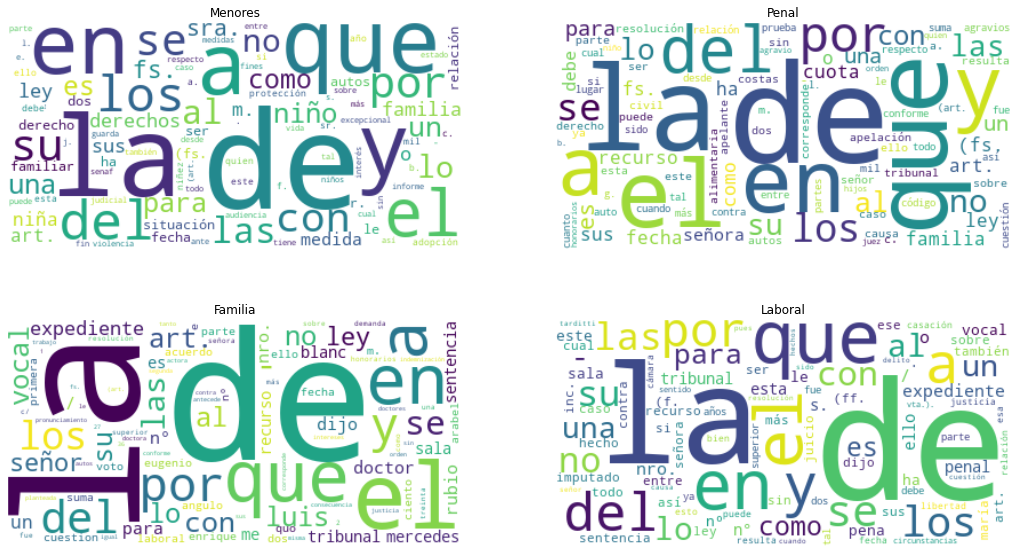

In [29]:
limit_words = 100

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes, df_common_word_total , limit_words, "Corpus completo" , columns = ["word","total_word_count"])

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes[0][0], df_common_words_menores , limit_words, "Menores" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[0][1], df_common_words_penal , limit_words, "Penal" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[1][0], df_common_words_familia , limit_words, "Familia" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[1][1], df_common_words_laboral , limit_words, "Laboral" , columns = ["word","count"])

# Conclusión 

- Las palabras con mayor frecuencia se repiten en los documentos de todos los fueros ( de, la que, el, en, y, a entre otras palabras). Lo mismo sucede con los bi-gramas ( de - la ; a – la ; en – el entre otros). 

- Vemos que en todos los casos se cumple la ley de Zipf. La ley de Zipf se cumple tanto en el corpus por fuero como así también en el corpus consolidado de todos los fueros.

- Se han detectado errores de ortografía y mal uso de los signos de puntación. 
 
